<a href="https://colab.research.google.com/github/kristinacovington/Colab/blob/master/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Overfitting



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

Resources:

@inproceedings{sklearn_api,
  author    = {Lars Buitinck and Gilles Louppe and Mathieu Blondel and
               Fabian Pedregosa and Andreas Mueller and Olivier Grisel and
               Vlad Niculae and Peter Prettenhofer and Alexandre Gramfort
               and Jaques Grobler and Robert Layton and Jake VanderPlas and
               Arnaud Joly and Brian Holt and Ga{\"{e}}l Varoquaux},
  title     = {{API} design for machine learning software: experiences from the scikit-learn
               project},
  booktitle = {ECML PKDD Workshop: Languages for Data Mining and Machine Learning},
  year      = {2013},
  pages = {108--122},
}

Importing libraries

In [28]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
!apt-get install -y graphviz
!pip install graphviz
import graphviz 

Automatically created module for IPython interactive environment
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


# Create Decision Tree

In [0]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)

## Graph

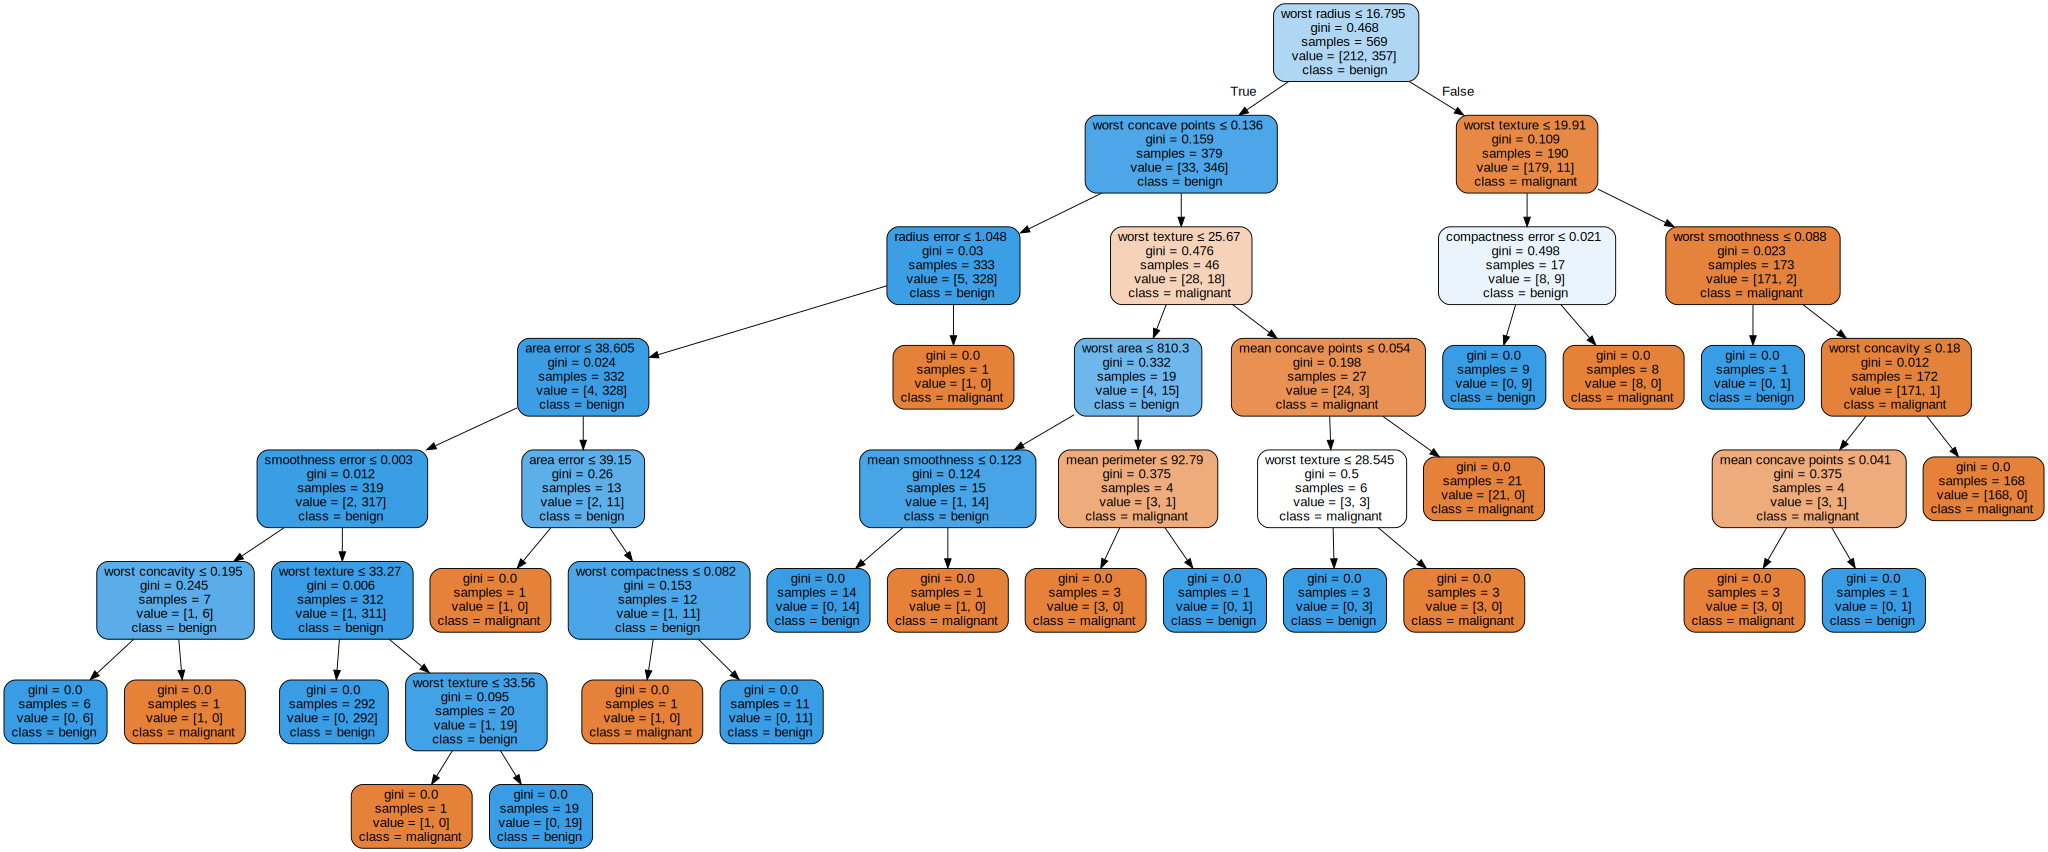

In [30]:
samples = load_breast_cancer()
clf_graph = DecisionTreeClassifier(random_state=0)
clf_graph = clf_graph.fit(samples.data, samples.target)
dot_data = tree.export_graphviz(clf_graph, out_file=None, 
                      feature_names=samples.feature_names,  
                      class_names=samples.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Train
Next, we train a decision tree. When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy.

In [32]:
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  1.0
Test score:  0.8811188811188811


# Minimal Cost Complexity Pruning

## Train
Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [0]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
# Remove trivial
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


## Plot Accuracy vs Apha for Training and Testing Sets
As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

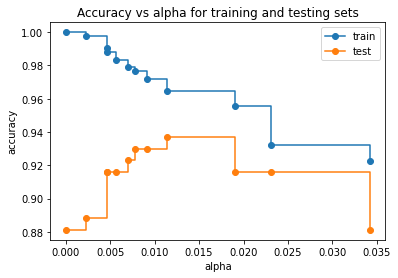

In [34]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()